# HW3 for Statistics with Meteorological Application
---
Student: 林之然 (B11209005, 大氣二), 蔡知諺（B11209014, 大氣二）

### Import and open file

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import norm
# Path
file_path = "../hw1/TS Statistics Meteor.txt"

# Load the data
data = pd.read_csv(file_path, header=None, names=['Value'])
data['Time'] = pd.date_range(start='2020-01-01', periods=len(data), freq='M')
data.set_index('Time', inplace=True)

### Calculate std. of raw data

In [18]:
# Now, we will calculate the mean, standard deviation, and the requested mean +- std values.
mean_temp = data['Value'].mean()
std_temp = data['Value'].std()

# Calculate mean ± std, mean ± 2*std, and mean ± 3*std
mean_plus_minus_std = [(mean_temp + i * std_temp, mean_temp - i * std_temp) for i in range(1, 4)]

# Calculate the percentage of months within each range
percentages = [(np.sum((data['Value'] <= upper) & (data['Value'] >= lower)) / len(data['Value'])) * 100
               for upper, lower in mean_plus_minus_std]

for i, (range_values, percentage) in enumerate(zip(mean_plus_minus_std, percentages)):
    result_text = f"For Mean ± {i+1}*std, the range is from {range_values[1]:5.2f}°C to {range_values[0]:5.2f}°C. "
    result_text += f"About {percentage:5.1f}% of the months fall within this range."
    print(result_text)

For Mean ± 1*std, the range is from  6.84°C to 16.08°C. About  50.2% of the months fall within this range.
For Mean ± 2*std, the range is from  2.21°C to 20.71°C. About 100.0% of the months fall within this range.
For Mean ± 3*std, the range is from -2.41°C to 25.33°C. About 100.0% of the months fall within this range.


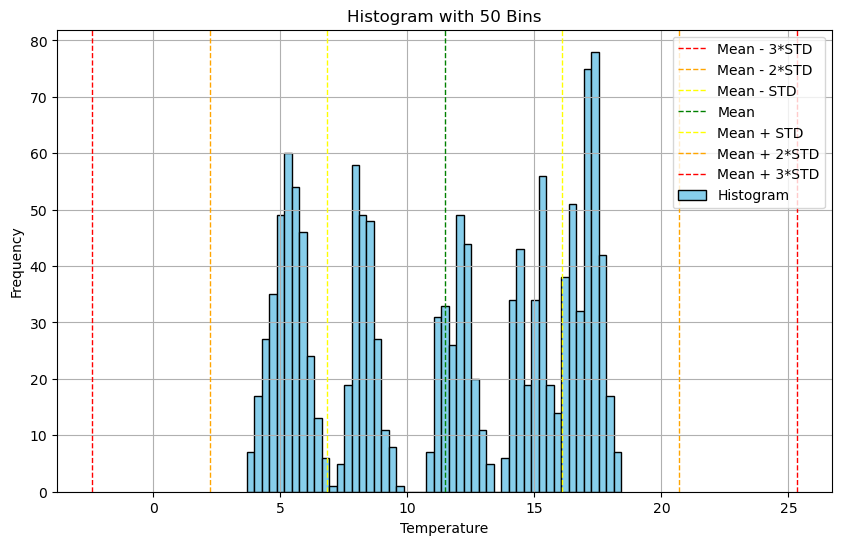

In [31]:
# Plotting histograms with different bin sizes for the original data
bins = 50

plt.figure(figsize=(10, 6))
plt.subplot(1, 1, i, )
plt.hist(data['Value'], bins=bins, color='skyblue', edgecolor='black')
plt.title(f'Histogram with {bins} Bins')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Adding lines for the mean and mean ± 1*std, mean ± 2*std, and mean ± 3*std
std_ranges = [mean_temp + i * std_temp for i in range(-3, 4)]
colors = ['red', 'orange', 'yellow', 'green', 'yellow', 'orange', 'red']

for std_range, color in zip(std_ranges, colors):
    plt.axvline(std_range, color=color, linestyle='dashed', linewidth=1)

# Adding legends for the lines
plt.legend(['Mean - 3*STD', 'Mean - 2*STD', 'Mean - STD', 'Mean', 
            'Mean + STD', 'Mean + 2*STD', 'Mean + 3*STD', 'Histogram'], loc='upper right')
plt.grid()
plt.show()

### Calculate std. of deseasonalized data

In [19]:
# Decomposition with a monthly period for surface temperature data
decomposition_result_monthly = seasonal_decompose(data['Value'], model='additive', period=12)
data['Deseasonalized'] = data['Value'] - decomposition_result_monthly.seasonal

# Calculate the mean, standard deviation, and the requested mean +- std values.
mean_temp_de = data['Deseasonalized'].mean()
std_temp_de = data['Deseasonalized'].std()

# Calculate mean ± std, mean ± 2*std, and mean ± 3*std
mean_plus_minus_std_de = [(mean_temp_de + i * std_temp_de, mean_temp_de - i * std_temp_de) for i in range(1, 4)]

# Calculate the percentage of months within each range
percentages_de = [(np.sum((data['Deseasonalized'] <= upper) & (data['Deseasonalized'] >= lower)) / len(data['Deseasonalized'])) * 100
               for upper, lower in mean_plus_minus_std_de]

for i, (range_values_de, percentage_de) in enumerate(zip(mean_plus_minus_std_de, percentages_de)):
    result_text_de = f"For Mean ± {i+1}*std, the range is from {range_values_de[1]:5.2f}°C to {range_values_de[0]:5.2f}°C. "
    result_text_de += f"About {percentage_de:5.1f}% of the months fall within this range."
    print(result_text_de)

For Mean ± 1*std, the range is from 11.07°C to 11.85°C. About  70.9% of the months fall within this range.
For Mean ± 2*std, the range is from 10.68°C to 12.24°C. About  94.7% of the months fall within this range.
For Mean ± 3*std, the range is from 10.29°C to 12.63°C. About  99.5% of the months fall within this range.


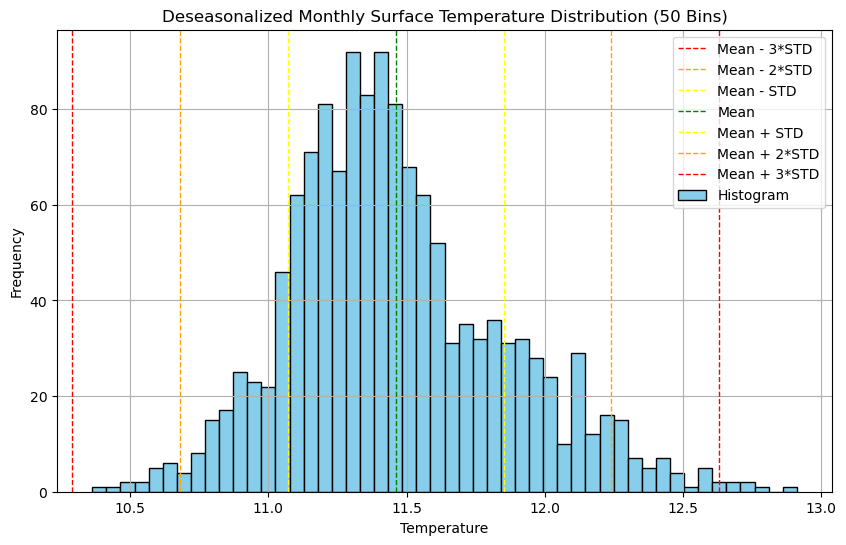

In [24]:
# Plotting the deseasonalized data histogram with the original bin size
plt.figure(figsize=(10, 6))
plt.hist(data['Deseasonalized'], bins=50, color='skyblue', edgecolor='black')
plt.title('Deseasonalized Monthly Surface Temperature Distribution (50 Bins)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Adding lines for the mean and mean ± 1*std, mean ± 2*std, and mean ± 3*std
std_ranges = [mean_temp_de + i * std_temp_de for i in range(-3, 4)]
colors = ['red', 'orange', 'yellow', 'green', 'yellow', 'orange', 'red']

for std_range, color in zip(std_ranges, colors):
    plt.axvline(std_range, color=color, linestyle='dashed', linewidth=1)

# Adding legends for the lines
plt.legend(['Mean - 3*STD', 'Mean - 2*STD', 'Mean - STD', 'Mean', 
            'Mean + STD', 'Mean + 2*STD', 'Mean + 3*STD', 'Histogram'])
plt.grid()
plt.show()

